#### EXPLORATORY DATA  ANALYSIS

### RED WINE DATASET 

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [62]:

red_wine=pd.read_csv('winequality-red.csv')


In [59]:
red_wine.describe()
red_wine.shape
red_wine.columns
red_wine.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [74]:
red_wine.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [14]:
## missing value in dataset
red_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
## Duplicate record
red_wine[red_wine.duplicated()]
## remove the duplicate
red_wine.drop_duplicates(inplace=True) #permanent
red_wine.shape

(1359, 12)

<AxesSubplot: >

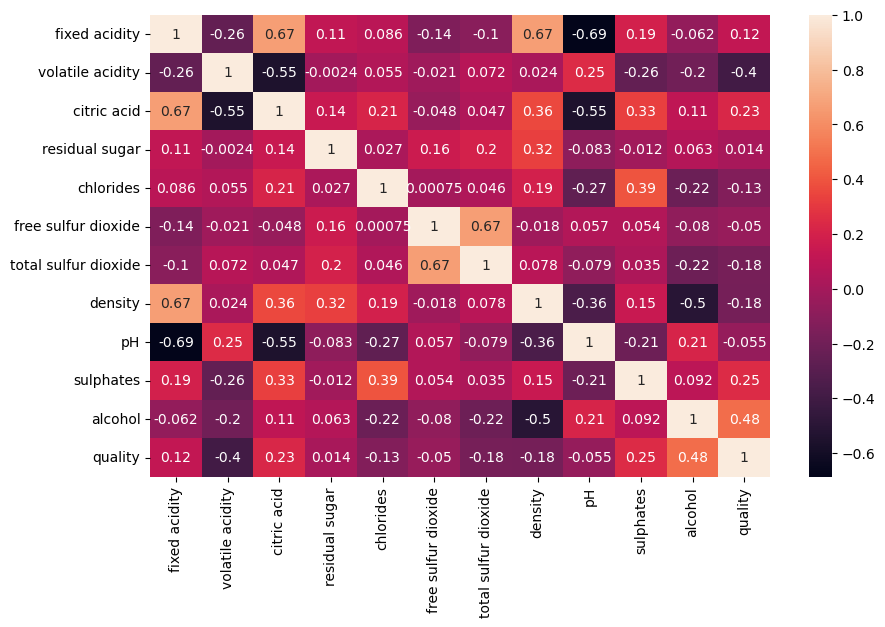

In [32]:
red_wine.corr(method='pearson')
plt.figure(figsize=(10,6))
sns.heatmap(red_wine.corr(),annot=True)


Text(0, 0.5, 'count')

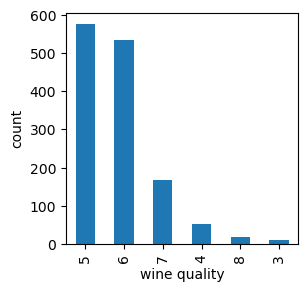

In [41]:
### visualization
##conculsion: Imbalanced data
plt.figure(figsize=(3,3))
red_wine.quality.value_counts().plot(kind='bar')
plt.xlabel("wine quality")
plt.ylabel("count")


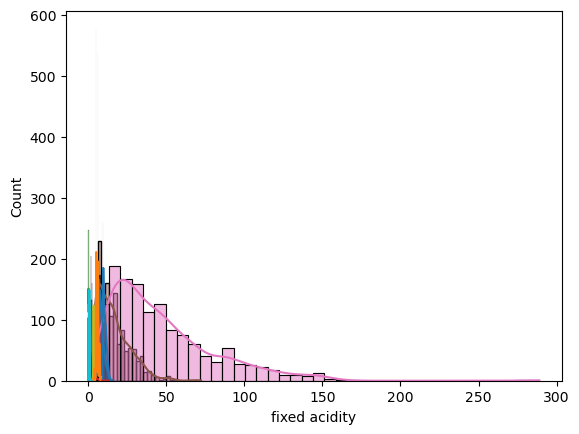

In [44]:
for column in red_wine.columns:
    sns.histplot(red_wine[column],kde=True)

### STUDENT PERFORMANCE INDICATOR

In [64]:
student=pd.read_csv('stud.csv') 
student.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [69]:
student.shape
student.isnull().sum()
student.isna().sum()
student.duplicated().sum()  

0

In [71]:
student.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race_ethnicity               1000 non-null   object
 2   parental_level_of_education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test_preparation_course      1000 non-null   object
 5   math_score                   1000 non-null   int64 
 6   reading_score                1000 non-null   int64 
 7   writing_score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [72]:
student.nunique() ## check the unique values of column

gender                          2
race_ethnicity                  5
parental_level_of_education     6
lunch                           2
test_preparation_course         2
math_score                     81
reading_score                  72
writing_score                  77
dtype: int64

In [73]:
student.describe()

,math_score,reading_score,writing_score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [80]:
## segerating numerical and categorical feature

numerical_feature=[feature for feature in student.columns if student[feature].dtype!='O']
categorical_feature=[feature for feature in student.columns if student[feature].dtype=='O']
      

In [81]:
student['total_score']=student['math_score']+student['reading_score']+student['writing_score']
student['Average']=(student['math_score']+student['reading_score']+student['writing_score'])/3
student.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score,total_score,Average
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


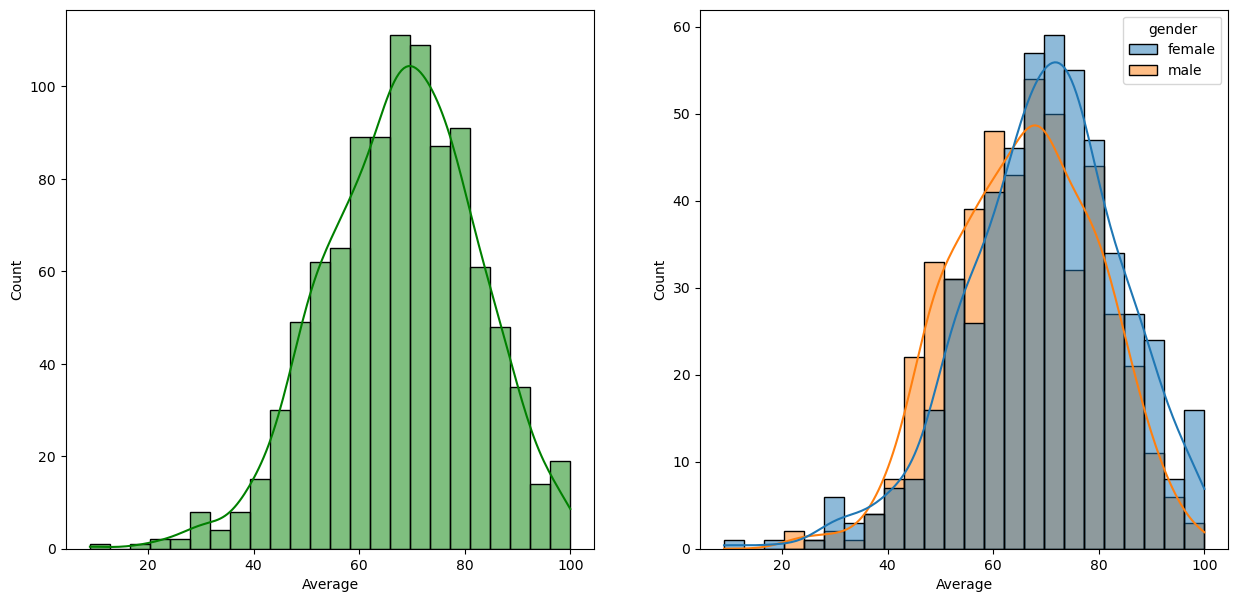

In [89]:
## explore More visualization
fig,axis=plt.subplots(1,2,figsize=(15,7))
plt.subplot(121)
sns.histplot(student.Average,kde=True,color='green')
plt.subplot(122)
sns.histplot(data=student ,x='Average',hue='gender',kde=True)
plt.show()

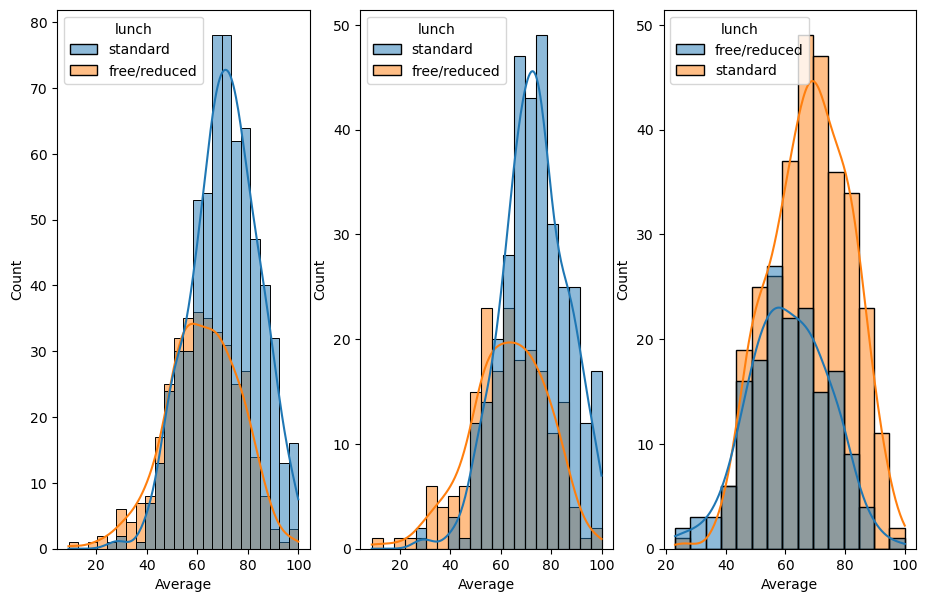

In [91]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=student,x='Average',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=student[student['gender']=='female'] ,x='Average',hue='lunch',kde=True)
plt.subplot(143)
sns.histplot(data=student[student['gender']=='male'] ,x='Average',hue='lunch',kde=True)
plt.show()
### conclusion :
#1: standard lunch perform well for both student

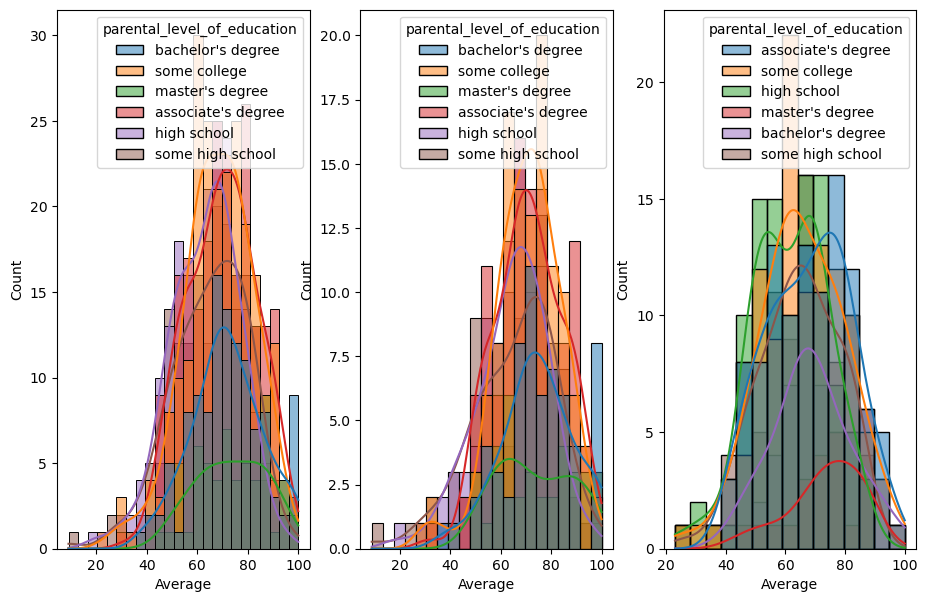

In [92]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=student,x='Average',kde=True,hue='parental_level_of_education')
plt.subplot(142)
sns.histplot(data=student[student['gender']=='female'] ,x='Average',hue='parental_level_of_education',kde=True)
plt.subplot(143)
sns.histplot(data=student[student['gender']=='male'] ,x='Average',hue='parental_level_of_education',kde=True)
plt.show()

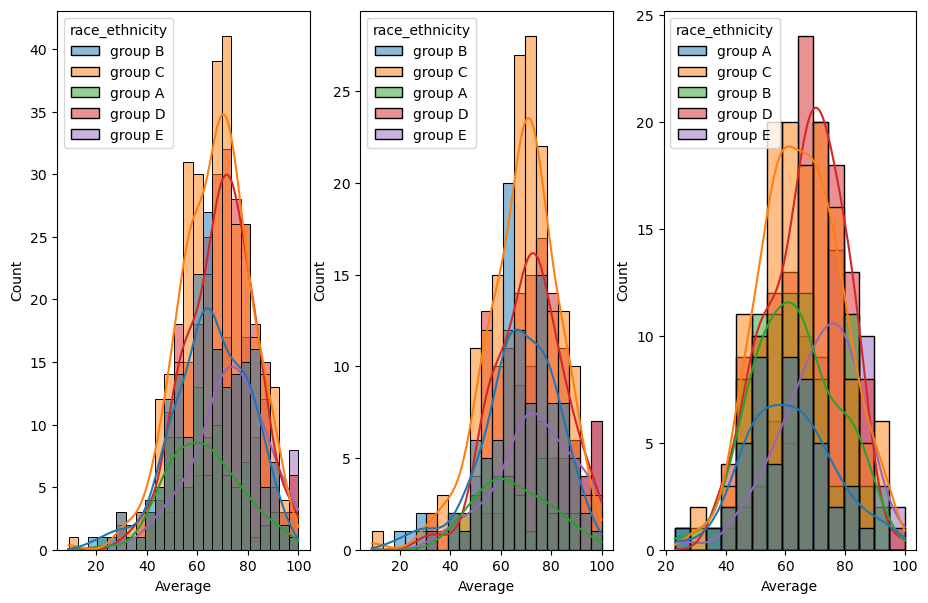

In [93]:
plt.subplots(1,3,figsize=(15,7))
plt.subplot(141)
sns.histplot(data=student,x='Average',kde=True,hue='race_ethnicity')
plt.subplot(142)
sns.histplot(data=student[student['gender']=='female'] ,x='Average',hue='race_ethnicity',kde=True)
plt.subplot(143)
sns.histplot(data=student[student['gender']=='male'] ,x='Average',hue='race_ethnicity',kde=True)
plt.show()

In [ ]:
sns.pairplot(student)